Datasource 

https://www.kaggle.com/datasets/thedevastator/women-in-headlines-bias?select=headlines.csv


In [1]:
#Imports 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

from collections import Counter 

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /Users/joyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Import data 

data = pd.read_csv('../news/headlines.csv')

In [3]:
#Explore dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382139 entries, 0 to 382138
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             382139 non-null  int64  
 1   Unnamed: 0        382139 non-null  int64  
 2   url               382139 non-null  object 
 3   headline_no_site  382139 non-null  object 
 4   site              382139 non-null  object 
 5   time              382139 non-null  object 
 6   country           382139 non-null  object 
 7   bias              382139 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 23.3+ MB


In [4]:
data.head()



,index,Unnamed: 0,url,headline_no_site,site,time,country,bias
0,0,0,https://www.iol.co.za/entertainment/movies-the...,'Lady Bird' buzzes through young sexuality,iol.co.za,2018-02-23 08:00:00+00:00,South Africa,0.000000
1,1,1,https://www.iol.co.za/entertainment/music/the-...,The shadowy urban POP super Starrah who loves ...,iol.co.za,2018-01-10 08:00:00+00:00,South Africa,0.166667
2,2,2,https://www.iol.co.za/entertainment/celebrity-...,Rihanna pens heartfelt tribute to her mom in b...,iol.co.za,2018-02-21 08:00:00+00:00,South Africa,0.333333
3,3,3,https://www.iol.co.za/news/south-africa/wester...,Shock as woman accused of killing teen girlfri...,iol.co.za,2018-02-27 08:00:00+00:00,South Africa,0.333333
4,4,4,https://www.iol.co.za/business-report/careers/...,TOP STORY: Meet South Africa's new first lady ...,iol.co.za,2018-02-15 08:00:00+00:00,South Africa,0.166667


Columns to drop 
index, unndaed: 0, url, site, time, country

In [5]:
#Drop un needed columns 

if all(col in data.columns for col in ['index', 'Unnamed: 0', 'url', 'site', 'time', 'country']):
    data.drop(columns=['index', 'Unnamed: 0', 'url', 'site', 'time', 'country'], inplace=True)

data.head()


,headline_no_site,bias
0,'Lady Bird' buzzes through young sexuality,0.000000
1,The shadowy urban POP super Starrah who loves ...,0.166667
2,Rihanna pens heartfelt tribute to her mom in b...,0.333333
3,Shock as woman accused of killing teen girlfri...,0.333333
4,TOP STORY: Meet South Africa's new first lady ...,0.166667


In [6]:
#Checking for blank rows 

# show blank rows
blank_df = data.isnull().any(axis=1)
blank_rows = data[blank_df]
print(blank_rows)

Empty DataFrame
Columns: [headline_no_site, bias]
Index: []


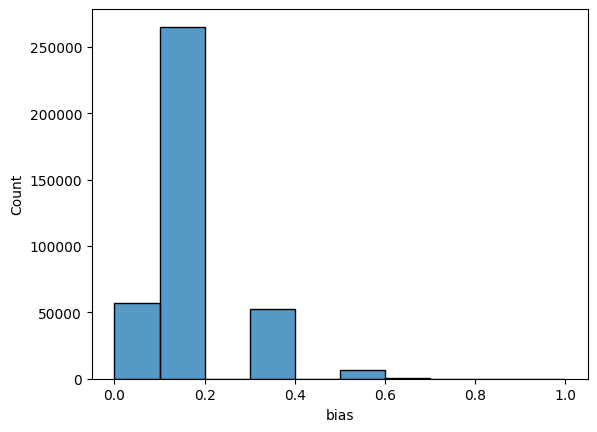

In [7]:
#ploting labels 
sns.histplot(data=data, x="bias", kde=False, bins=10)
plt.show()



In [8]:
#Duplicates 

duplicate_= data.duplicated(subset=['headline_no_site']).sum()

print(f"There are {duplicate_} duplicates in the 'headline_no_site' column.")

if duplicate_ > 0:
    data.drop_duplicates(subset=['headline_no_site'], inplace=True, keep='first')
    dups_= data.duplicated(subset=['headline_no_site']).sum()
    print(f"Now there are {dups_} duplicates in the 'headline_no_site' column.")

There are 14281 duplicates in the 'headline_no_site' column.
Now there are 0 duplicates in the 'headline_no_site' column.


#Model training

In [9]:
#imports 
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score



In [10]:
#split dataset 

X =data['headline_no_site']
y = data['bias']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(257500,)
(257500,)
(110358,)
(110358,)


#Random Forest 

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


In [12]:
#Bag of word

#create token of matrix
vector = CountVectorizer(stop_words='english')

#Normalize and add weighting
transformer = TfidfTransformer(norm = 'l2', sublinear_tf= True)

#train data
X_train_counts = vector.fit_transform(X_train)
X_train_tfidf = transformer.fit_transform(X_train_counts)

print(X_train_counts.shape)
print(X_train_tfidf.shape)



(257500, 74535)
(257500, 74535)


In [13]:
#Train data test
X_test_counts = vector.transform(X_test)
X_test_tfidf = transformer.transform(X_test_counts)

print(X_test_counts.shape)
print(X_test_tfidf.shape)




(110358, 74535)
(110358, 74535)


In [15]:
model_tree = RandomForestClassifier(n_estimators=200)
model_tree.fit(X_train_tfidf,y_train)

ValueError: Unknown label type: 'continuous'